In [1]:
import numpy as np
from matplotlib import pyplot as plt
# import tikzplotlib

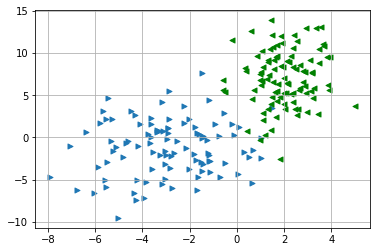

In [6]:
# создаем выборку из точек на плоскости - смеси двух гауссиан
N = 100
mu1 = -3, -1
sigma1 = 2, 3
mu2 = 2, 7
sigma2 = 1, 3
x1, y1 = np.random.normal(mu1[0], sigma1[0], N), np.random.normal(mu1[1], sigma1[1], N)
x2, y2 = np.random.normal(mu2[0], sigma2[0], N), np.random.normal(mu2[1], sigma2[1], N)

plt.scatter(x1, y1, s = 25, marker = '>')
plt.scatter(x2, y2, s = 25, c = 'green', marker = '<')
plt.grid()
plt.show()
# tikzplotlib.save("dataset.tex", flavor="context")

In [10]:
# смешиваем
first = np.c_[x1, y1]
second = np.c_[x2, y2]
learn_set = np.concatenate([first, second])
np.random.shuffle(learn_set)
print(learn_set.shape)

(200, 2)


In [11]:
# поиск наиболее близкого центра
def findBMU(mu_k, x):
    return min([ (np.linalg.norm(x - mu), i)  for i, mu in enumerate(mu_k) ])[1]

In [29]:
def k_means(K, data, tmax = 1000):
    
    classes = [ [] for _ in range(K)] # кластерные множества
    mu_k = [0] * K # центры
    
    # рандомно инициализируем 'центры' случайными элементами из обучающей выборки
    for i in range(K):
        ind = np.random.choice(len(data))
        classes[i].append(data[ind])
        mu_k[i] = classes[i][-1]
        
    for _ in range(tmax):
        # рассматриваем случайный элемент выборки
        ind = np.random.choice(len(data))
        x = np.copy(data[ind])
        
        # ищем ближайший 'центр'
        k = findBMU(mu_k, x)
        
        # если этого элемента нет в найденном кластере
        if not len([elem for elem in classes[k] if np.array_equal(elem, x)]): 
            classes[k].append(x) # добавляем его в кластерное множество
        
            mu_k[k] = np.sum(classes[k], axis = 0) / len(classes[k]) # уточняем центр после добавления
                                                                     # усредняем
    
    classes.clear()
    classes = [ [] for _ in range(K)]
        
    for elem in data: # определяем класс каждого элемента выборки
        k = findBMU(mu_k, elem)
        classes[k].append(elem)
    
    return classes

In [30]:
learn_result1, learn_result2 = k_means(2, learn_set) # класс 1, класс 2

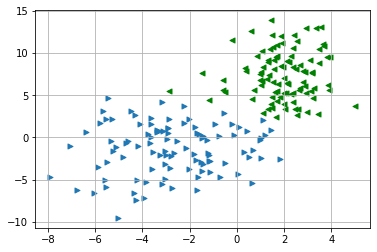

In [34]:
learn_result1, learn_result2 = np.array(learn_result1), np.array(learn_result2)
plt.scatter(learn_result1[:, 0], learn_result1[:, 1], s = 25, c = 'green', marker = '<')
plt.scatter(learn_result2[:, 0], learn_result2[:, 1], s = 25, marker = '>')
plt.grid()
plt.show()
# tikzplotlib.save("learn.tex", flavor="context")